## Purpose

The goal of this analysis is to compare our PanPAM screening data to those generated by the Sanjana group. These comparisons are shown in Figure 3 and Supp Figure 4

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
from matplotlib import rc
warnings.filterwarnings('ignore')
import gpplot as gpp


In [2]:
#read in panpam processed data 
panpam = pd.read_table('../data_v3 partial/Fig 1_3_PanPAM on-target/processed/panpam_avglfc_v2.txt')

In [3]:
essential = panpam[panpam['Construct IDs'] == 'Essential']

In [4]:
essential['N_PAM'] = ['N'+p[1:3]+'N'  for p in essential['PAM']]

In [5]:
ng = essential[essential['N_PAM'].str.startswith('NG')]

This first plot is just comparing the LFCs of Cas9-NG and xCas9 in our PanPAM data, considering only NG PAMs. This plot is shown in Supp Figure 4d

([<matplotlib.axis.YTick at 0x120842b80>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

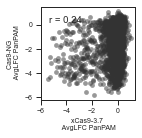

In [6]:
#compare activity with essential guides with Cas9-NG vs. xCas9-3.7 @ NG PAMs -- this is using only our data
gpp.set_aesthetics(context='paper')
fig, ax = plt.subplots(figsize=(1.7,1.7))
sns.scatterplot(y='Cas9-NG_AVGLFC_frompDNA', x='xCas9-3.7_AVGLFC_frompDNA',
               data=ng, color=".2", linewidth=0, alpha=0.5)
gpp.add_correlation(data=ng, y='Cas9-NG_AVGLFC_frompDNA', x='xCas9-3.7_AVGLFC_frompDNA')

plt.ylabel('Cas9-NG \n AvgLFC PanPAM', fontsize=7)
plt.xlabel('xCas9-3.7 \n AvgLFC PanPAM', fontsize=7)
plt.tick_params(axis='both', labelsize=7)
plt.xticks([-6,-4,-2,0])
plt.yticks([-6,-4,-2,0])

Next, we will read in the Sanjana data, that were obtained from their publication, Legut et al. 2020. For our comparisons, we will use the CD45 and CD55 ko data. Note that the CD46 data does not include the "top" bin, so we will exculde this set, as we can't calculate LFCs

In [8]:
#read in sanjana data
cd45 = pd.read_csv('../data_v3 partial/Fig 1_3_PanPAM on-target/external/Sanjana_comparison/Sanjana_ko_CD45_v2.csv')

In [9]:
cd55 = pd.read_csv('../data_v3 partial/Fig 1_3_PanPAM on-target/external/Sanjana_comparison/Sanjana_ko_CD55.csv')

In [10]:
#Concatenate the CD45 and CD55 data
sanjana = pd.concat([cd45, cd55])

In [11]:
#Calculate LFC by subtracting the bottom bin from the top bin
sanjana['nuclease_Cas9_LFC'] = sanjana['nuclease_top_Cas9'] - sanjana['nuclease_bottom_Cas9']
sanjana['nuclease_xCas9_LFC'] = sanjana['nuclease_top_xCas9'] - sanjana ['nuclease_bottom_xCas9']
sanjana['nuclease_Cas9NG_LFC'] = sanjana['nuclease_top_Cas9NG'] - sanjana['nuclease_bottom_Cas9NG']

In [12]:
sanjana.head()

,Unnamed: 0,UID,regionNum,start,stop,strand,PAM,Design.PAM,regionName,regionType,...,nuclease_presort_Cas9NG,nuclease_top_Cas9,nuclease_top_xCas9,nuclease_top_Cas9NG,nuclease_bottom_Cas9,nuclease_bottom_xCas9,nuclease_bottom_Cas9NG,nuclease_Cas9_LFC,nuclease_xCas9_LFC,nuclease_Cas9NG_LFC
0,96,CCguide_00096,1,198639295,198639276,-,TGG,NGG,CD45 promoter,CD45 promoter,...,6.354350,3.922223,4.054327,3.565289,8.098546,8.074567,8.454938,-4.176323,-4.020240,-4.889649
1,4658,CCguide_04658,13,198718206,198718225,+,TGG,NGG,CD45 CDS 13,CD45 CDS,...,5.557884,3.999185,4.999185,3.902324,6.972295,5.995893,7.296384,-2.973109,-0.996708,-3.394060
2,4695,CCguide_04695,12,198716784,198716803,+,AGT,NGT,CD45 CDS 12,CD45 CDS,...,7.164379,6.848743,7.131143,5.819862,7.775627,7.320372,8.737320,-0.926884,-0.189230,-2.917459
3,4621,CCguide_04621,13,198718159,198718178,+,TGG,NGG,CD45 CDS 13,CD45 CDS,...,6.456798,5.089951,5.749207,5.302254,8.361416,7.700582,8.122133,-3.271465,-1.951375,-2.819879
4,286,CCguide_00286,1,198639345,198639326,-,TGT,NGT,CD45 promoter,CD45 promoter,...,6.491286,5.866825,6.523562,5.081127,7.090598,6.688784,7.826766,-1.223772,-0.165222,-2.745639


In [13]:
#Z-score based on the nontargeting controls
def get_z_score(data,col,control_category):
    mean = data.loc[data['regionName'].str.contains(control_category),col].mean()
    std = data.loc[data['regionName'].str.contains(control_category),col].std()
    data[str(col + ';z-score')] = data[col].apply(lambda x: (x-mean)/std)
    return data

In [14]:
col = 'nuclease_Cas9_LFC'
get_z_score(sanjana, col, 'NonTargetingControlGuideForHuman')

,Unnamed: 0,UID,regionNum,start,stop,strand,PAM,Design.PAM,regionName,regionType,...,nuclease_top_Cas9,nuclease_top_xCas9,nuclease_top_Cas9NG,nuclease_bottom_Cas9,nuclease_bottom_xCas9,nuclease_bottom_Cas9NG,nuclease_Cas9_LFC,nuclease_xCas9_LFC,nuclease_Cas9NG_LFC,nuclease_Cas9_LFC;z-score
0,96,CCguide_00096,1,198639295,198639276,-,TGG,NGG,CD45 promoter,CD45 promoter,...,3.922223,4.054327,3.565289,8.098546,8.074567,8.454938,-4.176323,-4.020240,-4.889649,-18.625868
1,4658,CCguide_04658,13,198718206,198718225,+,TGG,NGG,CD45 CDS 13,CD45 CDS,...,3.999185,4.999185,3.902324,6.972295,5.995893,7.296384,-2.973109,-0.996708,-3.394060,-13.211637
2,4695,CCguide_04695,12,198716784,198716803,+,AGT,NGT,CD45 CDS 12,CD45 CDS,...,6.848743,7.131143,5.819862,7.775627,7.320372,8.737320,-0.926884,-0.189230,-2.917459,-4.004017
3,4621,CCguide_04621,13,198718159,198718178,+,TGG,NGG,CD45 CDS 13,CD45 CDS,...,5.089951,5.749207,5.302254,8.361416,7.700582,8.122133,-3.271465,-1.951375,-2.819879,-14.554180
4,286,CCguide_00286,1,198639345,198639326,-,TGT,NGT,CD45 promoter,CD45 promoter,...,5.866825,6.523562,5.081127,7.090598,6.688784,7.826766,-1.223772,-0.165222,-2.745639,-5.339957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2690,6959,CCguide_06959,0,0,0,0,TTTTTTT,0,NonTargetingControlGuideForHuman_0246,NT,...,6.477239,7.589920,6.697271,6.911652,6.739756,7.817492,-0.434413,0.850164,-1.120220,-1.787991
2691,6960,CCguide_06960,0,0,0,0,TTTTTTT,0,NonTargetingControlGuideForHuman_0247,NT,...,7.379942,8.268946,7.546527,7.767380,7.233130,8.496614,-0.387439,1.035816,-0.950087,-1.576616
2692,6961,CCguide_06961,0,0,0,0,TTTTTTT,0,NonTargetingControlGuideForHuman_0248,NT,...,6.516321,7.642387,6.440459,6.682868,6.541668,7.577575,-0.166547,1.100720,-1.137116,-0.582647
2693,6962,CCguide_06962,0,0,0,0,TTTTTTT,0,NonTargetingControlGuideForHuman_0249,NT,...,6.716977,7.566836,6.806412,6.666956,6.107108,7.459377,0.050021,1.459729,-0.652965,0.391867


In [15]:
col = 'nuclease_xCas9_LFC'
get_z_score(sanjana, col, 'NonTargetingControlGuideForHuman')

,Unnamed: 0,UID,regionNum,start,stop,strand,PAM,Design.PAM,regionName,regionType,...,nuclease_top_xCas9,nuclease_top_Cas9NG,nuclease_bottom_Cas9,nuclease_bottom_xCas9,nuclease_bottom_Cas9NG,nuclease_Cas9_LFC,nuclease_xCas9_LFC,nuclease_Cas9NG_LFC,nuclease_Cas9_LFC;z-score,nuclease_xCas9_LFC;z-score
0,96,CCguide_00096,1,198639295,198639276,-,TGG,NGG,CD45 promoter,CD45 promoter,...,4.054327,3.565289,8.098546,8.074567,8.454938,-4.176323,-4.020240,-4.889649,-18.625868,-17.807443
1,4658,CCguide_04658,13,198718206,198718225,+,TGG,NGG,CD45 CDS 13,CD45 CDS,...,4.999185,3.902324,6.972295,5.995893,7.296384,-2.973109,-0.996708,-3.394060,-13.211637,-7.208824
2,4695,CCguide_04695,12,198716784,198716803,+,AGT,NGT,CD45 CDS 12,CD45 CDS,...,7.131143,5.819862,7.775627,7.320372,8.737320,-0.926884,-0.189230,-2.917459,-4.004017,-4.378310
3,4621,CCguide_04621,13,198718159,198718178,+,TGG,NGG,CD45 CDS 13,CD45 CDS,...,5.749207,5.302254,8.361416,7.700582,8.122133,-3.271465,-1.951375,-2.819879,-14.554180,-10.555292
4,286,CCguide_00286,1,198639345,198639326,-,TGT,NGT,CD45 promoter,CD45 promoter,...,6.523562,5.081127,7.090598,6.688784,7.826766,-1.223772,-0.165222,-2.745639,-5.339957,-4.294154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2690,6959,CCguide_06959,0,0,0,0,TTTTTTT,0,NonTargetingControlGuideForHuman_0246,NT,...,7.589920,6.697271,6.911652,6.739756,7.817492,-0.434413,0.850164,-1.120220,-1.787991,-0.734844
2691,6960,CCguide_06960,0,0,0,0,TTTTTTT,0,NonTargetingControlGuideForHuman_0247,NT,...,8.268946,7.546527,7.767380,7.233130,8.496614,-0.387439,1.035816,-0.950087,-1.576616,-0.084064
2692,6961,CCguide_06961,0,0,0,0,TTTTTTT,0,NonTargetingControlGuideForHuman_0248,NT,...,7.642387,6.440459,6.682868,6.541668,7.577575,-0.166547,1.100720,-1.137116,-0.582647,0.143448
2693,6962,CCguide_06962,0,0,0,0,TTTTTTT,0,NonTargetingControlGuideForHuman_0249,NT,...,7.566836,6.806412,6.666956,6.107108,7.459377,0.050021,1.459729,-0.652965,0.391867,1.401910


In [16]:
col = 'nuclease_Cas9NG_LFC'
get_z_score(sanjana, col, 'NonTargetingControlGuideForHuman')

,Unnamed: 0,UID,regionNum,start,stop,strand,PAM,Design.PAM,regionName,regionType,...,nuclease_top_Cas9NG,nuclease_bottom_Cas9,nuclease_bottom_xCas9,nuclease_bottom_Cas9NG,nuclease_Cas9_LFC,nuclease_xCas9_LFC,nuclease_Cas9NG_LFC,nuclease_Cas9_LFC;z-score,nuclease_xCas9_LFC;z-score,nuclease_Cas9NG_LFC;z-score
0,96,CCguide_00096,1,198639295,198639276,-,TGG,NGG,CD45 promoter,CD45 promoter,...,3.565289,8.098546,8.074567,8.454938,-4.176323,-4.020240,-4.889649,-18.625868,-17.807443,-14.409311
1,4658,CCguide_04658,13,198718206,198718225,+,TGG,NGG,CD45 CDS 13,CD45 CDS,...,3.902324,6.972295,5.995893,7.296384,-2.973109,-0.996708,-3.394060,-13.211637,-7.208824,-9.460140
2,4695,CCguide_04695,12,198716784,198716803,+,AGT,NGT,CD45 CDS 12,CD45 CDS,...,5.819862,7.775627,7.320372,8.737320,-0.926884,-0.189230,-2.917459,-4.004017,-4.378310,-7.882980
3,4621,CCguide_04621,13,198718159,198718178,+,TGG,NGG,CD45 CDS 13,CD45 CDS,...,5.302254,8.361416,7.700582,8.122133,-3.271465,-1.951375,-2.819879,-14.554180,-10.555292,-7.560071
4,286,CCguide_00286,1,198639345,198639326,-,TGT,NGT,CD45 promoter,CD45 promoter,...,5.081127,7.090598,6.688784,7.826766,-1.223772,-0.165222,-2.745639,-5.339957,-4.294154,-7.314398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2690,6959,CCguide_06959,0,0,0,0,TTTTTTT,0,NonTargetingControlGuideForHuman_0246,NT,...,6.697271,6.911652,6.739756,7.817492,-0.434413,0.850164,-1.120220,-1.787991,-0.734844,-1.935597
2691,6960,CCguide_06960,0,0,0,0,TTTTTTT,0,NonTargetingControlGuideForHuman_0247,NT,...,7.546527,7.767380,7.233130,8.496614,-0.387439,1.035816,-0.950087,-1.576616,-0.084064,-1.372595
2692,6961,CCguide_06961,0,0,0,0,TTTTTTT,0,NonTargetingControlGuideForHuman_0248,NT,...,6.440459,6.682868,6.541668,7.577575,-0.166547,1.100720,-1.137116,-0.582647,0.143448,-1.991508
2693,6962,CCguide_06962,0,0,0,0,TTTTTTT,0,NonTargetingControlGuideForHuman_0249,NT,...,6.806412,6.666956,6.107108,7.459377,0.050021,1.459729,-0.652965,0.391867,1.401910,-0.389365


In [17]:
#Drop guides targeting the promoter for this analysis
sanjana = sanjana[~sanjana['regionName'].str.contains('promoter')]

In [18]:
#Drop guides targeting Nonessentials + BRCA from the panpam dataset
panpam = panpam[~panpam['Construct IDs'].str.contains('BRCA')]

In [19]:
panpam = panpam[panpam['Construct IDs']!= 'NonEssential']

In [20]:
panpam['Construct IDs'].value_counts()

Essential                10187
Non-targeting Control      989
Name: Construct IDs, dtype: int64

In [21]:
#Z-score based on the controls for panpam
def get_z_score(data,col,control_category):
    mean = data.loc[data['Construct IDs'].str.contains(control_category),col].mean()
    std = data.loc[data['Construct IDs'].str.contains(control_category),col].std()
    data[str(col + ';z-score')] = data[col].apply(lambda x: (x-mean)/std)
    return data

In [22]:
col = 'WTCas9_AVGLFC_frompDNA'
get_z_score(panpam, col, 'Non-targeting Control')

,Unnamed: 0,sgRNA Sequence,WTCas9_RepA,WTCas9_RepB,Cas9-HF1_RepA,Cas9-HF1_RepB,eCas9-1.1_RepA,eCas9-1.1_RepB,evoCas9_RepA,evoCas9_RepB,...,Cas9-HF1_AVGLFC_frompDNA,eCas9-1.1_AVGLFC_frompDNA,evoCas9_AVGLFC_frompDNA,HypaCas9_AVGLFC_frompDNA,xCas9-3.7_AVGLFC_frompDNA,Cas9-VQR_AVGLFC_frompDNA,Cas9-VRER_AVGLFC_frompDNA,Cas9-NG_AVGLFC_frompDNA,SpG_AVGLFC_frompDNA,WTCas9_AVGLFC_frompDNA;z-score
0,0,AAAAAAAGAATCCTTACCGC,-0.077711,0.002068,0.266438,-0.099818,-0.776220,-1.555231,-1.784345,-0.978657,...,0.083310,-1.165725,-1.381501,-0.296405,0.144860,-0.218410,-0.114731,-0.196348,0.321300,-0.054378
2,2,AAAAAACGCTTACTTGGGAT,-0.334378,0.481558,-0.515255,-0.051652,-0.743620,-0.430207,-1.751241,-1.501810,...,-0.283454,-0.586914,-1.626525,-0.287816,-0.611890,0.014306,0.261995,0.514624,0.579888,0.239637
3,3,AAAAAACGGCTCTCTCAACG,0.112944,0.410320,-0.362446,-0.298542,-1.093795,-0.575255,-1.821549,-0.854216,...,-0.330494,-0.834525,-1.337882,-0.398007,0.103804,0.154539,-0.405509,0.020424,0.377080,0.735882
4,4,AAAAAAGAATCCTTACCGCT,-0.066190,0.233701,-1.315477,-0.212304,-1.519946,-0.331414,-1.030853,-1.754746,...,-0.763891,-0.925680,-1.392799,-0.681239,0.155458,-0.298816,-0.187419,0.477734,0.235536,0.266466
6,6,AAAAACAGCGTCGCCTTGCG,0.070457,-0.491527,-0.709238,-0.391905,-0.869429,-0.470708,-1.327875,-1.102827,...,-0.550572,-0.670069,-1.215351,-0.785010,-0.275040,0.005343,-0.482916,-0.377088,-0.262087,-0.510171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18646,18763,TTTGTTTCAGGTTAATCGCC,-0.417285,0.113702,-0.381645,-0.239674,-1.015107,-1.031996,-1.432672,-1.029146,...,-0.310660,-1.023552,-1.230909,-0.777086,-0.211975,-0.511810,-0.928748,-0.615005,-0.191632,-0.355146
18647,18764,TTTTACCTTGTTCACATGGA,0.199666,-0.271798,-0.601760,-0.445527,-1.162882,-1.010247,-1.140705,-0.708264,...,-0.523643,-1.086564,-0.924484,-0.559395,0.213497,0.016980,-0.302755,0.238400,0.250774,-0.049746
18648,18765,TTTTGACTCTAATCACCGGT,0.015334,0.857815,0.234623,-0.736042,-0.547798,-0.845626,-1.063448,-0.527352,...,-0.250710,-0.696712,-0.795400,-0.293995,0.149120,0.025927,0.135423,0.168849,0.699317,1.197556
18649,18766,TTTTTAATACAAGGTAATCT,-0.146801,-0.230351,-0.990103,-0.336577,-1.713795,-1.482104,-2.323740,-1.526096,...,-0.663340,-1.597949,-1.924918,-0.660871,-0.007743,0.188566,-0.336291,-0.171532,-0.275450,-0.452220


In [23]:
col = 'xCas9-3.7_AVGLFC_frompDNA'
get_z_score(panpam, col, 'Non-targeting Control')

,Unnamed: 0,sgRNA Sequence,WTCas9_RepA,WTCas9_RepB,Cas9-HF1_RepA,Cas9-HF1_RepB,eCas9-1.1_RepA,eCas9-1.1_RepB,evoCas9_RepA,evoCas9_RepB,...,eCas9-1.1_AVGLFC_frompDNA,evoCas9_AVGLFC_frompDNA,HypaCas9_AVGLFC_frompDNA,xCas9-3.7_AVGLFC_frompDNA,Cas9-VQR_AVGLFC_frompDNA,Cas9-VRER_AVGLFC_frompDNA,Cas9-NG_AVGLFC_frompDNA,SpG_AVGLFC_frompDNA,WTCas9_AVGLFC_frompDNA;z-score,xCas9-3.7_AVGLFC_frompDNA;z-score
0,0,AAAAAAAGAATCCTTACCGC,-0.077711,0.002068,0.266438,-0.099818,-0.776220,-1.555231,-1.784345,-0.978657,...,-1.165725,-1.381501,-0.296405,0.144860,-0.218410,-0.114731,-0.196348,0.321300,-0.054378,0.668993
2,2,AAAAAACGCTTACTTGGGAT,-0.334378,0.481558,-0.515255,-0.051652,-0.743620,-0.430207,-1.751241,-1.501810,...,-0.586914,-1.626525,-0.287816,-0.611890,0.014306,0.261995,0.514624,0.579888,0.239637,-1.755651
3,3,AAAAAACGGCTCTCTCAACG,0.112944,0.410320,-0.362446,-0.298542,-1.093795,-0.575255,-1.821549,-0.854216,...,-0.834525,-1.337882,-0.398007,0.103804,0.154539,-0.405509,0.020424,0.377080,0.735882,0.537447
4,4,AAAAAAGAATCCTTACCGCT,-0.066190,0.233701,-1.315477,-0.212304,-1.519946,-0.331414,-1.030853,-1.754746,...,-0.925680,-1.392799,-0.681239,0.155458,-0.298816,-0.187419,0.477734,0.235536,0.266466,0.702948
6,6,AAAAACAGCGTCGCCTTGCG,0.070457,-0.491527,-0.709238,-0.391905,-0.869429,-0.470708,-1.327875,-1.102827,...,-0.670069,-1.215351,-0.785010,-0.275040,0.005343,-0.482916,-0.377088,-0.262087,-0.510171,-0.676374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18646,18763,TTTGTTTCAGGTTAATCGCC,-0.417285,0.113702,-0.381645,-0.239674,-1.015107,-1.031996,-1.432672,-1.029146,...,-1.023552,-1.230909,-0.777086,-0.211975,-0.511810,-0.928748,-0.615005,-0.191632,-0.355146,-0.474315
18647,18764,TTTTACCTTGTTCACATGGA,0.199666,-0.271798,-0.601760,-0.445527,-1.162882,-1.010247,-1.140705,-0.708264,...,-1.086564,-0.924484,-0.559395,0.213497,0.016980,-0.302755,0.238400,0.250774,-0.049746,0.888908
18648,18765,TTTTGACTCTAATCACCGGT,0.015334,0.857815,0.234623,-0.736042,-0.547798,-0.845626,-1.063448,-0.527352,...,-0.696712,-0.795400,-0.293995,0.149120,0.025927,0.135423,0.168849,0.699317,1.197556,0.682642
18649,18766,TTTTTAATACAAGGTAATCT,-0.146801,-0.230351,-0.990103,-0.336577,-1.713795,-1.482104,-2.323740,-1.526096,...,-1.597949,-1.924918,-0.660871,-0.007743,0.188566,-0.336291,-0.171532,-0.275450,-0.452220,0.180051


In [24]:
col = 'Cas9-NG_AVGLFC_frompDNA'
get_z_score(panpam, col, 'Non-targeting Control')

,Unnamed: 0,sgRNA Sequence,WTCas9_RepA,WTCas9_RepB,Cas9-HF1_RepA,Cas9-HF1_RepB,eCas9-1.1_RepA,eCas9-1.1_RepB,evoCas9_RepA,evoCas9_RepB,...,evoCas9_AVGLFC_frompDNA,HypaCas9_AVGLFC_frompDNA,xCas9-3.7_AVGLFC_frompDNA,Cas9-VQR_AVGLFC_frompDNA,Cas9-VRER_AVGLFC_frompDNA,Cas9-NG_AVGLFC_frompDNA,SpG_AVGLFC_frompDNA,WTCas9_AVGLFC_frompDNA;z-score,xCas9-3.7_AVGLFC_frompDNA;z-score,Cas9-NG_AVGLFC_frompDNA;z-score
0,0,AAAAAAAGAATCCTTACCGC,-0.077711,0.002068,0.266438,-0.099818,-0.776220,-1.555231,-1.784345,-0.978657,...,-1.381501,-0.296405,0.144860,-0.218410,-0.114731,-0.196348,0.321300,-0.054378,0.668993,-0.742433
2,2,AAAAAACGCTTACTTGGGAT,-0.334378,0.481558,-0.515255,-0.051652,-0.743620,-0.430207,-1.751241,-1.501810,...,-1.626525,-0.287816,-0.611890,0.014306,0.261995,0.514624,0.579888,0.239637,-1.755651,1.243284
3,3,AAAAAACGGCTCTCTCAACG,0.112944,0.410320,-0.362446,-0.298542,-1.093795,-0.575255,-1.821549,-0.854216,...,-1.337882,-0.398007,0.103804,0.154539,-0.405509,0.020424,0.377080,0.735882,0.537447,-0.136996
4,4,AAAAAAGAATCCTTACCGCT,-0.066190,0.233701,-1.315477,-0.212304,-1.519946,-0.331414,-1.030853,-1.754746,...,-1.392799,-0.681239,0.155458,-0.298816,-0.187419,0.477734,0.235536,0.266466,0.702948,1.140251
6,6,AAAAACAGCGTCGCCTTGCG,0.070457,-0.491527,-0.709238,-0.391905,-0.869429,-0.470708,-1.327875,-1.102827,...,-1.215351,-0.785010,-0.275040,0.005343,-0.482916,-0.377088,-0.262087,-0.510171,-0.676374,-1.247232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18646,18763,TTTGTTTCAGGTTAATCGCC,-0.417285,0.113702,-0.381645,-0.239674,-1.015107,-1.031996,-1.432672,-1.029146,...,-1.230909,-0.777086,-0.211975,-0.511810,-0.928748,-0.615005,-0.191632,-0.355146,-0.474315,-1.911726
18647,18764,TTTTACCTTGTTCACATGGA,0.199666,-0.271798,-0.601760,-0.445527,-1.162882,-1.010247,-1.140705,-0.708264,...,-0.924484,-0.559395,0.213497,0.016980,-0.302755,0.238400,0.250774,-0.049746,0.888908,0.471800
18648,18765,TTTTGACTCTAATCACCGGT,0.015334,0.857815,0.234623,-0.736042,-0.547798,-0.845626,-1.063448,-0.527352,...,-0.795400,-0.293995,0.149120,0.025927,0.135423,0.168849,0.699317,1.197556,0.682642,0.277547
18649,18766,TTTTTAATACAAGGTAATCT,-0.146801,-0.230351,-0.990103,-0.336577,-1.713795,-1.482104,-2.323740,-1.526096,...,-1.924918,-0.660871,-0.007743,0.188566,-0.336291,-0.171532,-0.275450,-0.452220,0.180051,-0.673122


In [25]:
pam_3nt = set(list(sanjana.PAM))

In [26]:
#drop the control PAMs
pam_3nt.remove('TTTTTTT')

In [27]:
#Calculate the median Z-score of each 3nt PAM for both datasets
columns = sanjana.columns
cond = list(columns[22:])

colnames = ['PAM']
pams = pam_3nt
colnames.extend(pams)
median_zscore_df = pd.DataFrame(columns=colnames)


for i,c in enumerate(cond):
    #print (c)
    row = [c]
    for i,p in enumerate(pams):
        #print(p)
        p_df = sanjana[sanjana['PAM'] == p]
        c_df = p_df.loc[:,[c]]
        #print (c_df)
        median_zscore = c_df.median()
        row.append(float(median_zscore))
        #print(row)
    median_zscore_df = median_zscore_df.append(pd.Series(row, index = colnames), ignore_index=True)

In [28]:
median_zscore_df_sanjana = median_zscore_df

In [29]:
median_zscore_df_sanjana.head()

,PAM,GAG,AGA,GAC,TGG,CAT,GGT,TAT,GCA,AGT,...,TTC,TCG,GCT,CTC,AGC,TCC,TGC,TTT,ATG,TAC
0,nuclease_Cas9_LFC;z-score,-0.854757,-0.916808,0.049116,-7.265083,-0.420632,-0.991562,-0.079339,0.402122,-1.809787,...,-0.048927,-0.325618,0.112921,-0.531913,-0.622942,-0.268504,-0.381048,-0.112052,-0.773505,0.191819
1,nuclease_xCas9_LFC;z-score,-0.175513,-0.764675,0.054882,-2.627343,-0.116584,-0.831491,0.092798,0.301327,-1.187068,...,0.243675,-1.240146,-0.845135,0.260354,-1.113626,-0.319512,-0.837067,-0.458790,-0.046283,0.248376
2,nuclease_Cas9NG_LFC;z-score,-0.112991,-0.668738,-0.845057,-3.056096,-0.771082,-1.844469,-0.083834,0.132224,-3.133185,...,0.169456,-0.199490,0.279111,-0.655879,-0.340549,-0.126731,-0.747948,-0.139640,-0.062543,-0.263158


In [30]:
#transpose dfs to allow for smooth merge
median_zscore_df_sanjana_t = median_zscore_df_sanjana.T
median_zscore_df_sanjana_t.insert(0,'PAM',median_zscore_df_sanjana_t.index)
median_zscore_df_sanjana_t.index = list(range(0,len(median_zscore_df_sanjana_t)))
median_zscore_df_sanjana_t.columns = list(median_zscore_df_sanjana_t.iloc[0,:])
median_zscore_df_sanjana_t = median_zscore_df_sanjana_t.drop(0)
median_zscore_df_sanjana_t.head()

,PAM,nuclease_Cas9_LFC;z-score,nuclease_xCas9_LFC;z-score,nuclease_Cas9NG_LFC;z-score
1,GAG,-0.854757,-0.175513,-0.112991
2,AGA,-0.916808,-0.764675,-0.668738
3,GAC,0.049116,0.054882,-0.845057
4,TGG,-7.265083,-2.627343,-3.056096
5,CAT,-0.420632,-0.116584,-0.771082


In [31]:
#median_zscore_df_sanjana_t.to_csv('../data_v3 partial/Fig 1_3_PanPAM on-target/external/Sanjana_comparison/Sanjana_med+zscore_v3.csv')

In [32]:
#drop the control PAMs that are "NA"
panpam = panpam.dropna()

In [33]:
panpam['3 nuc PAM'] = [p[0:3]  for p in panpam.PAM]

In [34]:
cond = ['WTCas9_AVGLFC_frompDNA;z-score',
       'xCas9-3.7_AVGLFC_frompDNA;z-score',
       'Cas9-NG_AVGLFC_frompDNA;z-score']

In [35]:
#Calculate the median Z-score of each 3nt PAM for PanPAM

colnames = ['PAM']
pams = pam_3nt
colnames.extend(pams)
median_zscore_df = pd.DataFrame(columns=colnames)

for c in cond:
    #print (c)
    row = [c]
    for i,p in enumerate(pams):
        #print(p)
        p_df = panpam[panpam['3 nuc PAM'] == p]
        c_df = p_df.loc[:,[c]]
        #print (c_df)
        median_zscore = c_df.median()
        row.append(float(median_zscore))
        #print(row)
    median_zscore_df = median_zscore_df.append(pd.Series(row, index = colnames), ignore_index=True)

In [36]:
panpam_median_zscore_df = median_zscore_df

In [37]:
#transpose dfs to allow for smooth merge
panpam_median_zscore_df_t = panpam_median_zscore_df.T
panpam_median_zscore_df_t.insert(0,'PAM',panpam_median_zscore_df_t.index)
panpam_median_zscore_df_t.index = list(range(0,len(panpam_median_zscore_df_t)))
panpam_median_zscore_df_t.columns = list(panpam_median_zscore_df_t.iloc[0,:])
panpam_median_zscore_df_t = panpam_median_zscore_df_t.drop(0)
panpam_median_zscore_df_t.head()

,PAM,WTCas9_AVGLFC_frompDNA;z-score,xCas9-3.7_AVGLFC_frompDNA;z-score,Cas9-NG_AVGLFC_frompDNA;z-score
1,GAG,-0.857892,-0.00157,-0.619371
2,AGA,0.010415,0.077139,-1.91386
3,GAC,0.167807,-0.000444,-0.133476
4,TGG,-10.330834,-0.601884,-2.966565
5,CAT,0.163498,0.102692,-0.014908


In [39]:
#merge median z-scores for the 2 data sets to make comparisons
sanjana_panpam = pd.merge(median_zscore_df_sanjana_t, panpam_median_zscore_df_t, on = 'PAM')

In [40]:
sanjana_panpam['N_PAM'] = ['N' + p[1:3] for p in sanjana_panpam.PAM]

## Plots comparing data sets start here 

In [41]:
gpp.set_aesthetics(context='paper', palette='Set2')

In [42]:
pam_type = []
for i in sanjana_panpam.N_PAM:
    pam = ''
    if i == 'NGG':
        pam = i
    elif i == 'NGA':
        pam = i
    elif i == 'NGC':
        pam = i
    elif i == 'NGT':
        pam = i
    else:
        pam = 'other'
    pam_type.append(pam)

In [43]:
sanjana_panpam['n_pam_hue'] = pam_type

In [44]:
color_dictionary = dict({'NGG':'#fc8d62',
                  'NGA':'#e78ac3',
                  'NGT': '#a6d854',
                  'NGC': '#8da0cb',
                  'other' : '#66c2a5'})

Figure 3c, right panel

Text(0.5, 1.0, 'Cas9-NG')

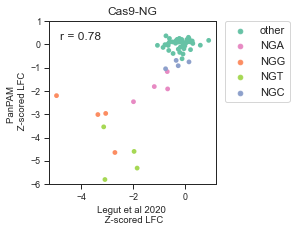

In [48]:
#all NG PAMs
gpp.set_aesthetics(context='paper')
ax = sns.scatterplot(x = 'nuclease_Cas9NG_LFC;z-score', y = 'Cas9-NG_AVGLFC_frompDNA;z-score',
               data = sanjana_panpam, hue = 'n_pam_hue', linewidth=0., palette=color_dictionary)
sns.set(rc={'figure.figsize':(3,3)})
gpp.add_correlation(data=sanjana_panpam, x = 'nuclease_Cas9NG_LFC;z-score', y = 'Cas9-NG_AVGLFC_frompDNA;z-score')
plt.ylim(-6,1)
ax.legend(facecolor='white', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Legut et al 2020 \n Z-scored LFC')
plt.ylabel('PanPAM \n Z-scored LFC')
plt.title ('Cas9-NG')
#plt.savefig('../figures/Sanjana_Panpam_Cas9NG_v3.pdf', dpi=1000, bbox_inches='tight', transparent=True)

In [49]:
gpp.set_aesthetics(context='paper')

Figure 3c, right panel

Text(0.5, 1.0, 'xCas9-3.7')

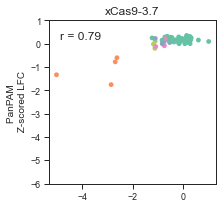

In [50]:

ax = sns.scatterplot(x = 'nuclease_xCas9_LFC;z-score', y = 'xCas9-3.7_AVGLFC_frompDNA;z-score',
               data = sanjana_panpam, hue = 'n_pam_hue', linewidth=0., palette=color_dictionary,legend=False)
sns.set(rc={'figure.figsize':(3,3)})
gpp.add_correlation(data=sanjana_panpam, x = 'nuclease_xCas9_LFC;z-score', y = 'xCas9-3.7_AVGLFC_frompDNA;z-score')
plt.ylim(-6,1)
#ax.legend(facecolor='white', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('')
plt.ylabel('PanPAM \n Z-scored LFC', fontsize=10)
plt.title ('xCas9-3.7')
#plt.savefig('../figures/Sanjana_Panpam_xCas9-3.7_v3.pdf', dpi=1000, bbox_inches='tight', transparent=True)

Compare xCas9 to Cas9-NG within the Legut et al dataset, considering only NG PAMs. This plot is shown in Supp Fig 4e

In [51]:
sanjana_ng = sanjana[sanjana['PAM'].str.endswith('GG')]

([<matplotlib.axis.YTick at 0x123b1e3a0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

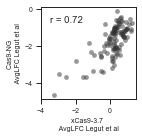

In [52]:
gpp.set_aesthetics(context='paper')
fig, ax = plt.subplots(figsize=(1.7,1.7))

sns.scatterplot(x = 'nuclease_xCas9_LFC', y = 'nuclease_Cas9NG_LFC', data= sanjana_ng, color=".2", linewidth=0., alpha=0.5)
gpp.add_correlation(x = 'nuclease_xCas9_LFC', y = 'nuclease_Cas9NG_LFC', data= sanjana_ng)

plt.ylabel('Cas9-NG \n AvgLFC Legut et al', fontsize=7)
plt.xlabel('xCas9-3.7 \n AvgLFC Legut et al', fontsize=7)
#plt.title('Sanjana ng PAMs \n xCas9 vs. NG')
plt.tick_params(axis='both', labelsize=7)
plt.xticks([-4, -2, 0])
plt.yticks([-4, -2, 0])
#plt.savefig('../../Figures/panels/Fig 3/Sanjana_NGvsxCas9.pdf', dpi=1000, bbox_inches='tight', transparent=True)